In [114]:
import pandas as pd
import numpy as np
from collections import Counter

In [115]:
comp = pd.read_csv("companies.csv")
# acq = pd.read_csv("acquisitions.csv")

In [116]:
print(comp.shape)
comp.head()

(66368, 14)


,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/-fame,#fame,http://livfame.com,Media,10000000,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24


# split the category column

In [117]:
## split the category column
# new data frame with split value columns 
#new = comp["category_list"].str.split("|", n = 2, expand = True) 
  
# making seperate first name column from new data frame 
#comp["category_1"]= new[0] 
  
# making seperate last name column from new data frame 
#comp["category_2"]= new[1] 
  
# # Dropping old Name columns 
#comp.drop(columns =["category_list"], inplace = True) 

# df display 
#comp.head()

# filter the dataset by "first_funding_at" after 1990 

In [118]:
# filter the dataset by "first_funding_at" after 1990
comp_filter = comp[comp['first_funding_at'] >= '1990-01-01']

In [120]:
comp_filter.shape

(66297, 14)

# Label the dataset 
### ipo and acquired , lable = 1, others label = 0

In [121]:
comp.groupby('status').count()

,permalink,name,homepage_url,category_list,funding_total_usd,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
status,,,,,,,,,,,,,
acquired,5549,5549,5087,5429,5549,5249,5189,5204,5204,5549,4333,5548,5549
closed,6238,6237,5519,5285,6238,4587,4456,4487,4487,6238,4082,6237,6238
ipo,1547,1547,1511,1534,1547,1507,1480,1491,1491,1547,1187,1547,1547
operating,53034,53034,49193,50972,53034,48067,46696,47156,47158,53034,41545,53012,53034


In [195]:
# Check the companies with same names
# names = comp_filter['name']
# sorted(Counter(names).items(), key=lambda x: x[1], reverse=True)

In [196]:
comp_filter['label'] = 0
comp_filter.loc[comp_filter.status == 'ipo', 'label'] = 1
comp_filter.loc[comp_filter.status == 'acquired', 'label'] = 1
comp_filter.head()

/Users/cicipan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/cicipan/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,label
0,/organization/-fame,#fame,http://livfame.com,Media,10000000,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05,0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14,0
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30,0
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19,0
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24,0


In [124]:
comp_filter.to_csv("comp_filter.csv", index=False, encoding='utf8')

In [125]:
df = pd.read_csv('comp_filter.csv')

In [126]:
df.head()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,label
0,/organization/-fame,#fame,http://livfame.com,Media,10000000,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05,0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14,0
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30,0
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19,0
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24,0


# Add investor number to the dataset

In [127]:
investor = pd.read_csv('investments.csv')
investor_num = investor[['company_permalink',
                         'investor_permalink']].groupby(['company_permalink']).agg(['count'])

In [128]:
comp_plus_InvestorNum = pd.merge(how='inner',left=df, right=investor_num, 
                                 left_on='permalink', right_on='company_permalink')

/Users/cicipan/anaconda3/lib/python3.6/site-packages/pandas/core/reshape/merge.py:544: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


In [129]:
comp_plus_InvestorNum.to_csv('comp_plus_InvestorNum',index=False, encoding='utf8')

# Deal with the data type
1. calculate the funding_duration
2. Change datetime to UTC

In [197]:
df = pd.read_csv('comp_plus_InvestorNum.csv')

In [198]:
df.head()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,label,"('investor_permalink', 'count')"
0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19,0,1
1,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24,0,1
2,/organization/01games-technology,01Games Technology,http://www.01games.hk/,Games,41250,operating,HKG,NaN,Hong Kong,Hong Kong,1,NaN,2014-07-01,2014-07-01,0,1
3,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,33600000,operating,USA,CA,SF Bay Area,Mountain View,4,2011-01-01,2013-01-03,2015-11-09,0,14
4,/organization/1,One Inc.,http://whatis1.com,Mobile,1150050,operating,USA,CA,SF Bay Area,San Francisco,3,2011-08-01,2011-07-20,2014-02-05,0,13


In [132]:
df.rename(columns={"('investor_permalink', 'count')": "Num_of_investor"}, inplace=True)
#df['Num_of_investor'] = df.iloc[:,-1]

In [133]:
# convert '-' to NAN in comp['funding_total_usd']:
df['funding_total_usd'] = pd.to_numeric(df['funding_total_usd'], errors='coerce')

In [134]:
# calculate the funding_duration between 'first_funding_at' and 'last_funding_at'
t1 = pd.to_datetime(df.first_funding_at, errors='coerce')
t1 = pd.to_timedelta(t1).dt.days
t2 = pd.to_datetime(df.last_funding_at, errors='coerce')
t2 = pd.to_timedelta(t2).dt.days

In [135]:
# funding_duration means how many days between the first and last fund raising.
df['funding_duration'] = t2 - t1

In [136]:
# convert datetime type for "last_funding_at","first_funding_at"
# we will drop "founded_at" feature, since it contains too many NaN.
#df['founded_at_UTC'] = pd.to_datetime(df.founded_at, errors='coerce')
df['first_funding_at_UTC'] = t1
df['last_funding_at_UTC'] = t2

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44682 entries, 0 to 44681
Data columns (total 19 columns):
permalink               44682 non-null object
name                    44681 non-null object
homepage_url            41931 non-null object
category_list           42263 non-null object
funding_total_usd       36167 non-null float64
status                  44682 non-null object
country_code            39700 non-null object
state_code              38516 non-null object
region                  38879 non-null object
city                    38881 non-null object
funding_rounds          44682 non-null int64
founded_at              33278 non-null object
first_funding_at        44682 non-null object
last_funding_at         44682 non-null object
label                   44682 non-null int64
Num_of_investor         44682 non-null int64
funding_duration        44682 non-null int64
first_funding_at_UTC    44682 non-null int64
last_funding_at_UTC     44682 non-null int64
dtypes: float64(1), in

In [138]:
df.to_csv('companies_allFeatures.csv', index=False, encoding='utf8')

# Date Preprocessing
1. Select features, filter out missing data
2. Shuffle the dataset
4. Split dataset to training, dev and test set (90%, 5%, 5%)
2. Upsample the training set to balance.
3. Encode and transform category features.
2. Encode and transform text features.
3. Concatenate all the features.

In [139]:
import sklearn
from scipy.sparse import hstack
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.utils import resample, shuffle
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [140]:
df = pd.read_csv('companies_allFeatures.csv')

In [141]:
df

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,label,Num_of_investor,funding_duration,first_funding_at_UTC,last_funding_at_UTC
0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2.000000e+06,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19,0,1,0,13957,13957
1,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,NaN,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24,0,1,0,16275,16275
2,/organization/01games-technology,01Games Technology,http://www.01games.hk/,Games,4.125000e+04,operating,HKG,NaN,Hong Kong,Hong Kong,1,NaN,2014-07-01,2014-07-01,0,1,0,16252,16252
3,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,3.360000e+07,operating,USA,CA,SF Bay Area,Mountain View,4,2011-01-01,2013-01-03,2015-11-09,0,14,1040,15708,16748
4,/organization/1,One Inc.,http://whatis1.com,Mobile,1.150050e+06,operating,USA,CA,SF Bay Area,San Francisco,3,2011-08-01,2011-07-20,2014-02-05,0,13,931,15175,16106
5,/organization/1-2-3-listo,"1,2,3 Listo",http://www.123listo.com,E-Commerce,4.000000e+04,operating,CHL,12,Santiago,Las Condes,1,2012-01-01,2013-02-18,2013-02-18,0,1,0,15754,15754
6,/organization/1-800-dentist,1-800-DENTIST,http://www.1800dentist.com,Health and Wellness,NaN,operating,USA,CA,Los Angeles,Los Angeles,1,1986-01-01,2010-08-19,2010-08-19,0,2,0,14840,14840
7,/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,5.000000e+06,acquired,USA,CA,SF Bay Area,Cupertino,1,2012-03-01,2015-03-17,2015-03-17,1,1,0,16511,16511
8,/organization/1000-corks,1000 Corks,http://1000corks.com,Search,4.000000e+04,operating,USA,OR,"Portland, Oregon",Lake Oswego,1,2008-01-01,2011-08-23,2011-08-23,0,1,0,15209,15209
9,/organization/1000-markets,1000 Markets,http://www.1000markets.com,Art|E-Commerce|Marketplaces,5.000000e+05,acquired,USA,WA,Seattle,Seattle,1,2009-01-01,2009-05-15,2009-05-15,1,3,0,14379,14379


In [142]:
# select meaningful features
df = df.drop(columns=['permalink', 'name', 'homepage_url', 'status', 'state_code',
                      'region','city', 'founded_at', 'first_funding_at','last_funding_at'])

In [143]:
df_clean = df.dropna()

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44682 entries, 0 to 44681
Data columns (total 9 columns):
category_list           42263 non-null object
funding_total_usd       36167 non-null float64
country_code            39700 non-null object
funding_rounds          44682 non-null int64
label                   44682 non-null int64
Num_of_investor         44682 non-null int64
funding_duration        44682 non-null int64
first_funding_at_UTC    44682 non-null int64
last_funding_at_UTC     44682 non-null int64
dtypes: float64(1), int64(6), object(2)
memory usage: 3.1+ MB


In [145]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32698 entries, 0 to 44680
Data columns (total 9 columns):
category_list           32698 non-null object
funding_total_usd       32698 non-null float64
country_code            32698 non-null object
funding_rounds          32698 non-null int64
label                   32698 non-null int64
Num_of_investor         32698 non-null int64
funding_duration        32698 non-null int64
first_funding_at_UTC    32698 non-null int64
last_funding_at_UTC     32698 non-null int64
dtypes: float64(1), int64(6), object(2)
memory usage: 2.5+ MB


In [146]:
df_clean.head()

,category_list,funding_total_usd,country_code,funding_rounds,label,Num_of_investor,funding_duration,first_funding_at_UTC,last_funding_at_UTC
0,Curated Web,2000000.0,CHN,1,0,1,0,13957,13957
2,Games,41250.0,HKG,1,0,1,0,16252,16252
3,Analytics,33600000.0,USA,4,0,14,1040,15708,16748
4,Mobile,1150050.0,USA,3,0,13,931,15175,16106
5,E-Commerce,40000.0,CHL,1,0,1,0,15754,15754


In [179]:
df_clean.iloc[23]

category_list           Audio|Mobile|Music
funding_total_usd                   440000
country_code                           AUS
funding_rounds                           3
label                                    0
Num_of_investor                          3
funding_duration                       425
first_funding_at_UTC                 15461
last_funding_at_UTC                  15886
Name: 32, dtype: object

In [147]:
# shuffle and split the dataset into tain, dev, and test set.
X = df_clean.drop(columns=['label'])
y = df_clean['label']
X_train, X_test_, y_train, y_test_ = train_test_split(X, y, test_size=0.1, random_state=2,
                                                      stratify=y, shuffle=True)
X_dev, X_test, y_dev, y_test = train_test_split(X_test_, y_test_, test_size=0.5, random_state=2,
                                            shuffle=False)

In [148]:
df = X_dev
df['label'] = y_dev
df.to_csv('dev.csv')

/Users/cicipan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [149]:
df = X_test
df['label'] = y_test
df.to_csv('test.csv')

/Users/cicipan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [150]:
df = X_train
df['label'] = y_train
df.to_csv('train.csv')

/Users/cicipan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


# Upsamle the training set

In [151]:
df = pd.read_csv('train.csv', )

In [152]:
df.shape

(29428, 10)

In [153]:
# Separate majority and minority classes
df_majority = df[df.label==0]
df_minority = df[df.label==1]

# n is the number of majority class (label = 0)
n = df.label.value_counts()[0]

# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=n,    # to match majority class
                                 random_state=123) # reproducible results

# downsample majority class
# df_majority_downsampled = resample(df_majority, 
#                                  replace=False,     # sample with replacement
#                                  n_samples=n,    # to match majority class
#                                  random_state=123) # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
# df_downsampled = pd.concat([df_minority, df_majority_downsampled])    

In [154]:
df_upsampled = shuffle(df_upsampled)
df_upsampled.to_csv('train_upsampled_shuffled.csv', index=False)

In [155]:
df.shape

(29428, 10)

# Transform categorical and text features

In [156]:
df = pd.read_csv('train_upsampled_shuffled.csv')
X_train = df.iloc[:,1:-1]
y_train = df.iloc[:,-1]

In [157]:
df_dev = pd.read_csv('dev.csv')
X_dev = df_dev.iloc[:,1:-1]
y_dev = df_dev.iloc[:,-1]

df_test = pd.read_csv('test.csv')
X_test = df_test.iloc[:,1:-1]
y_test = df_test.iloc[:,-1]

In [158]:
df_dev.shape

(1635, 10)

In [159]:
X_train

,category_list,funding_total_usd,country_code,funding_rounds,Num_of_investor,funding_duration,first_funding_at_UTC,last_funding_at_UTC
0,E-Commerce|Fashion|Mobile|Retail|Social Media,1218770.0,CAN,2,2,210,15400,15610
1,Apps|Consumers|Doctors|Health and Wellness|Hea...,13125000.0,USA,3,21,791,15461,16252
2,Biotechnology,85999999.0,USA,5,10,2524,13727,16251
3,Enterprise Software,206800.0,USA,3,1,317,14921,15238
4,Fitness|Hardware|Health and Wellness|Personal ...,66000000.0,USA,4,15,1768,14162,15930
5,Security|Web Tools,955000.0,USA,2,2,1250,13161,14411
6,Fashion,4516456.0,FRA,1,1,0,16694,16694
7,Software,5000000.0,ISR,1,2,0,13521,13521
8,Advertising|Digital Media|Education|Online Vid...,460000.0,USA,1,3,0,16252,16252
9,Enterprise Software,6640000.0,USA,4,8,1287,13939,15226


In [160]:
### separate the 3 tpye of features ###
X_train_text = X_train.category_list
X_train_country = X_train.country_code
X_train_nums = X_train.drop(columns=['category_list','country_code'])

X_dev_text = X_dev.category_list
X_dev_country = X_dev.country_code
X_dev_nums = X_dev.drop(columns=['category_list','country_code'])

X_test_text = X_test.category_list
X_test_country = X_test.country_code
X_test_nums = X_test.drop(columns=['category_list','country_code'])

In [161]:
# encode text feature
X_train.category_list = X_train.category_list.astype(str)
vectorizer1 = CountVectorizer(min_df=5)
vectorizer1.fit(X_train.category_list)
X_train_text = vectorizer1.transform(X_train.category_list)

X_dev_text = vectorizer1.transform(X_dev.category_list)
X_test_text = vectorizer1.transform(X_test.category_list)

In [162]:
# encode categorical feature
X_train.country_code= X_train.country_code.astype(str)
vectorizer2 = CountVectorizer(min_df=1)
vectorizer2.fit(X_train.category_list)
X_train_country = vectorizer2.transform(X_train.country_code)

X_dev_country = vectorizer2.transform(X_dev.country_code)
X_test_country = vectorizer2.transform(X_test.country_code)

In [163]:
X_train_text.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

# Conduct feature scaling/normalization for numerical features

In [164]:
scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(X_train_nums)
X_train_nums = scaler.transform(X_train_nums)
X_dev_nums = scaler.transform(X_dev_nums)
X_test_nums = scaler.transform(X_test_nums)

In [165]:
# concatinate inputs to ONE single input X
X_train_con = hstack([X_train_nums, X_train_country, X_train_text])
X_dev_con = hstack([X_dev_nums, X_dev_country, X_dev_text])
X_test_con = hstack([X_test_nums, X_test_country, X_test_text])

# Feed models

In [166]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 
from sklearn import ensemble
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score, auc
from scipy import interp
%matplotlib inline 

0.8403669724770643
0.3916083916083916
TPR: 0.32941176470588235
FPR: 0.06521739130434782


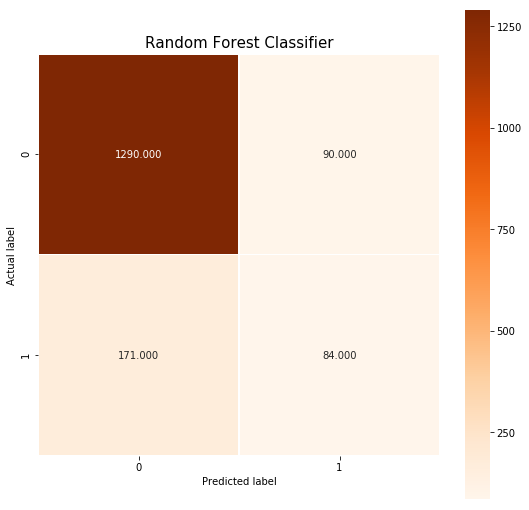

In [191]:
####  Random Forest  ####
model_RF = sklearn.ensemble.RandomForestClassifier(n_estimators=25, random_state=521) 
model_RF.fit(X_train_con, y_train)

y_pred = model_RF.predict(X_dev_con)
acc = accuracy_score(y_dev, y_pred)
f1 = f1_score(y_dev, y_pred)
print(acc)
print(f1)

cm = confusion_matrix(y_dev, y_pred)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Oranges');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
# all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title('Random Forest Classifier', size = 15);
plt.savefig('Confusion_matrix_RF.png')


tpr = cm[1,1]/(cm[1,1] + cm[1,0])
fpr = cm[0,1]/(cm[0,1] + cm[0,0])
print('TPR: {0}'.format(tpr))
print('FPR: {0}'.format(fpr))

0.7253822629969419
0.4422360248447205
Accuracy Score: 0.7926605504587156
TPR: 0.6980392156862745
FPR: 0.26956521739130435


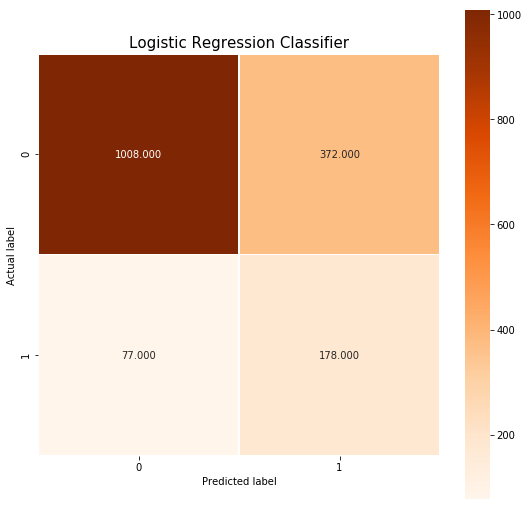

In [192]:
#### Logistic Regression #####
model_LR = LogisticRegression()
model_LR.fit(X_train_con, y_train)

y_pred = model_LR.predict(X_dev_con)
acc = accuracy_score(y_dev, y_pred)
print(acc)

f1 = f1_score(y_dev, y_pred)
print(f1)
print('Accuracy Score: {0}'.format(score))

cm = confusion_matrix(y_dev, y_pred)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Oranges');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
# all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title('Logistic Regression Classifier', size = 15);
plt.savefig('Confusion_matrix_LR.png')

tpr = cm[1,1]/(cm[1,1] + cm[1,0])
fpr = cm[0,1]/(cm[0,1] + cm[0,0])
print('TPR: {0}'.format(tpr))
print('FPR: {0}'.format(fpr))


In [172]:
# probas_ = model_LR.predict_proba(X_dev_con)

# tprs = []
# aucs = []
# mean_fpr = np.linspace(0, 1, 100)
# # Compute ROC curve and area the curve
# fpr, tpr, thresholds = roc_curve(y_dev, probas_[:, 1])
# tprs.append(interp(mean_fpr, fpr, tpr))
# tprs[-1][0] = 0.0
# roc_auc = auc(fpr, tpr)
# aucs.append(roc_auc)


# plt.plot(fpr, tpr, lw=1, alpha=0.3,
#          label='ROC (AUC = %0.2f)' % roc_auc)

# # plt.plot(x,x, "--")
# # plt.set_xlim([0,1])
# # plt.set_ylim([0,1])
# plt.title("ROC Curve", fontsize=14)
# plt.ylabel('TPR', fontsize=12)
# plt.xlabel('FPR', fontsize=12)
# plt.savefig('ROC_curve.png')


# print(roc_auc)

0.7333333333333333
0.46437346437346444
TPR: 0.7411764705882353
FPR: 0.26811594202898553


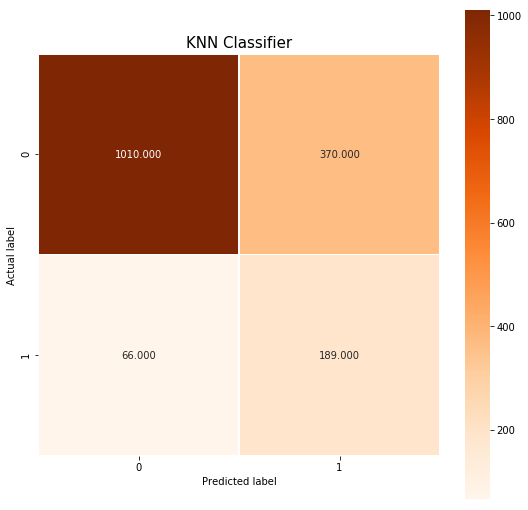

In [193]:
model_knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=90)
model_knn.fit(X_train_con, y_train)

y_pred = model_knn.predict(X_dev_con)

acc = accuracy_score(y_dev, y_pred)
f1 = sklearn.metrics.f1_score(y_dev, y_pred)
print(acc)
print(f1)

cm = confusion_matrix(y_dev, y_pred)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Oranges');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
# all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title('KNN Classifier', size = 15);
plt.savefig('Confusion_matrix_KNN.png')

tpr = cm[1,1]/(cm[1,1] + cm[1,0])
fpr = cm[0,1]/(cm[0,1] + cm[0,0])
print('TPR: {0}'.format(tpr))
print('FPR: {0}'.format(fpr))

# Choose KNN and Test it on the test set!

In [175]:
model_knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=90)
model_knn.fit(X_train_con, y_train)
y_pred = model_knn.predict(X_test_con)

acc = accuracy_score(y_test, y_pred)
f1 = sklearn.metrics.f1_score(y_test, y_pred)
print('Accuracy: {0}'.format(acc))
print('F1 score: {0}'.format(f1))

Accuracy: 0.7370030581039755
F1 score: 0.4444444444444445


In [176]:
model_RF = sklearn.ensemble.RandomForestClassifier(n_estimators=25, random_state=521) 
model_RF.fit(X_train_con, y_train)

y_pred = model_RF.predict(X_test_con)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(acc)
print(f1)

0.8470948012232415
0.3811881188118812
